In [3]:
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import linregress
from astropy.io import fits
import elk
from elk.ensemble import EnsembleLC
import elk.utils as u

In [24]:
print(np.logspace(-0.7, 0.7, 1000))

[0.19952623 0.20017111 0.20081808 0.20146713 0.20211829 0.20277154
 0.20342691 0.2040844  0.20474401 0.20540576 0.20606964 0.20673567
 0.20740385 0.20807419 0.2087467  0.20942138 0.21009824 0.21077729
 0.21145854 0.21214198 0.21282764 0.21351551 0.21420561 0.21489793
 0.21559249 0.2162893  0.21698836 0.21768968 0.21839326 0.21909912
 0.21980726 0.22051769 0.22123042 0.22194545 0.22266279 0.22338245
 0.22410443 0.22482875 0.22555541 0.22628442 0.22701579 0.22774951
 0.22848561 0.22922409 0.22996496 0.23070822 0.23145388 0.23220195
 0.23295244 0.23370536 0.23446071 0.2352185  0.23597874 0.23674143
 0.2375066  0.23827423 0.23904435 0.23981695 0.24059205 0.24136966
 0.24214978 0.24293243 0.2437176  0.24450531 0.24529556 0.24608837
 0.24688374 0.24768169 0.24848221 0.24928532 0.25009102 0.25089933
 0.25171025 0.25252379 0.25333996 0.25415877 0.25498023 0.25580434
 0.25663111 0.25746056 0.25829269 0.25912751 0.25996502 0.26080524
 0.26164818 0.26249384 0.26334224 0.26419337 0.26504726 0.2659

In [12]:
#get quaver periodogram statistics
import re
from scipy.signal import find_peaks
import os
import lightkurve as lk
from astropy.io import fits
import numpy as np

catalog_q = "D:results new/"+'Milky Way GCs 102'
method = 'full_hybrid'
for galaxy in os.listdir(catalog_q):
    if galaxy != 'NGC5286':
        continue
    galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
    for file in os.listdir(catalog_q+'/'+galaxyname):
        galaxynew = galaxy
        #if file.endswith(method+'_lc_cleaned.fits') or file.endswith(method+'_lc_diameter_cleaned.fits'):
        #if file.endswith(method+'_lc_diameter_cleaned.fits'):
        if file.endswith(method+'_lc_cleaned.fits'):
            sector = re.search(r'sector(\d+)', file).group(1)
            lc_quaver = fits.open(catalog_q+'/'+galaxyname+'/'+file)
            data_q = lc_quaver[1].data
            time_q = data_q['time']
            flux_q = data_q['flux']
            #if file.endswith('diameter_cleaned.fits'):
            #    galaxynew = galaxy + ' diameter'
            
            try:
                tesslc = lk.LightCurve(time=time_q, flux=flux_q)
                pg = tesslc.to_periodogram(frequency=np.logspace(-0.7, 0.7, 1000))
                powers = pg.power.value
                freqs = pg.frequency.value
                peaks, _ = find_peaks(powers)
                peakfreqs = freqs[peaks]
                peakpowers = powers[peaks]
                sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
                freqs_highestpeaks = [freq for power, freq in sorted_peaks]
                print(galaxynew, '\t', sector, '\t', freqs_highestpeaks)
            except IndexError:
                print(galaxy, sector, ': IndexError (no cleaned lc?)')
            
            #fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
            """pg.plot(ax=ax1, color="black", linewidth=1.25)
            ax1.set_xscale('log')
            ax1.set_title(galaxy+', Sector '+sector+' (quaver)') #"""

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5286 	 38 	 [0.20807419265898236, 0.6563222342537414, 0.5749891632335211, 0.42592127055490225, 1.523641814659884]
NGC5286 	 64 	 [0.3322166705270767, 0.2074038514132945, 0.2591275050252968, 0.5495915414434686, 0.423181356668702]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC5286 	 65 	 [0.214897930026486, 0.4314544324104831, 0.2574605606898091, 0.4830409880099456, 1.673106257601937]


In [9]:
#get elk periodogram statistics
import elk
import os
catalog = "D:results new/elk globular clusters 102"
for file in os.listdir(catalog):
    if file.endswith("output_table.fits"):
        galaxy = file.split("output_table.fits")[0]
        a = elk.ensemble.from_fits(catalog+'/'+file)
        if len(a.lcs) > 0:
            for sec in range(0,len(a.lcs)):
                lc_e = a.lcs[sec]
                sector = a.lcs[sec].sector
                #if hasattr(lc_e, 'sector'):
                    #lc_e.to_periodogram(frequencies=np.logspace(-1, 1, 500))
                    #lc_e.plot_periodogram(fig=fig1,ax=ax2,title=galaxy+', Sector '+sector+' (elk)') 
                stats = lc_e.get_stats_using_defaults()
                elk_peakfreqs = stats['peak_freqs']
                elk_peakpowers = stats['power_at_peaks']
                indices = sorted(range(len(elk_peakpowers)), key=lambda i: elk_peakpowers[i], reverse=True)[:10]
                five_freqs = [elk_peakfreqs[i] for i in indices]
                print(galaxy, '\t', sector, '\t', five_freqs)

E 3 	 10 	 [2.985038245118731, 3.040646493467067, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


KeyboardInterrupt: 

In [10]:
#get elk periodogram statistics without elk
import elk
import os
from scipy.signal import find_peaks
import lightkurve as lk
from astropy.io import fits
import numpy as np
catalog = "D:results new/elk globular clusters 102"

for file in os.listdir(catalog):
    if "_lc_" in file:
        galaxy = file.split("_lc_")[0]
        sector = file.split("_lc_")[-1][:-5]
        lc_e = fits.open(catalog+'/'+file)
        data_e = lc_e[1].data
        time_e = data_e['time']
        flux_e = data_e['flux']
                
        tesslc = lk.LightCurve(time=time_e, flux=flux_e)
        pg = tesslc.to_periodogram(frequency=np.logspace(-0.7, 0.7, 1000))
        powers = pg.power.value
        freqs = pg.frequency.value
        peaks, _ = find_peaks(powers)
        peakfreqs = freqs[peaks]
        peakpowers = powers[peaks]
        sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
        freqs_highestpeaks = [freq for power, freq in sorted_peaks]
        print(galaxy, '\t', sector, '\t', freqs_highestpeaks)

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 10 	 [2.9810851035089003, 3.039364473489115, 2.9239232319382764, 1.4992562772868054, 3.1188464522080173]
E 3 	 11 	 [2.9810851035089003, 1.4944262053414161, 3.039364473489115, 2.933373520967323, 3.108798635180998]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 12 	 [2.9810851035089003, 1.489611694174628, 0.2790909447098572, 2.933373520967323, 0.3322166705270767]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 37 	 [2.9810851035089003, 1.4944262053414161, 3.039364473489115, 2.9239232319382764, 2.849408757545961]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 38 	 [2.9810851035089003, 3.039364473489115, 2.933373520967323, 1.489611694174628, 0.2047440129850992]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 39 	 [2.9810851035089003, 3.039364473489115, 2.933373520967323, 1.4992562772868054, 4.462205318939402]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 64 	 [2.9810851035089003, 1.489611694174628, 2.933373520967323, 3.039364473489115, 1.437664859982702]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 65 	 [2.9810851035089003, 1.489611694174628, 0.3258464643790078, 2.933373520967323, 3.039364473489115]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


E 3 	 66 	 [2.9810851035089003, 1.489611694174628, 2.933373520967323, 0.6273320811450488, 3.039364473489115]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


ESO 452-SC11 	 12 	 [3.7365644061435654, 3.1188464522080173, 3.7973399602321742, 3.676761550842388, 3.0590430268915894]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


ESO 452-SC11 	 39 	 [3.7365644061435654, 3.1188464522080173, 0.2919882433839827, 0.2060696407696271, 3.7973399602321742]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


IC 4499 	 12 	 [1.7335602450146694, 2.023979951099021, 1.9660456319443407, 1.3565394633714902, 1.8671154435935449]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


IC 4499 	 13 	 [1.9915866167437917, 1.744784288118248, 2.070217693367691, 1.8611002598924467, 2.831078762868565]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


IC 4499 	 65 	 [2.7767932409762413, 1.90976962236634, 1.8611002598924467, 2.723548636039592, 1.9787749160750798]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


IC 4499 	 66 	 [1.9980235398986221, 1.8078282023422116, 1.5940520659723516, 1.6516496053358436, 2.8128666834267366]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56 	 14 	 [0.6584435056818478, 0.7371698553572773, 0.5749891632335211, 0.5253157480874739, 0.9359901346055364]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56 	 40 	 [0.6605716331819216, 0.5805823967113583, 0.7419427072122867, 0.7888546629300639, 0.5338600556896645]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56 	 41 	 [0.6627066389131835, 0.7183835125047002, 0.6054552955841149, 1.317709933378266, 0.2599650201115741]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M56 	 54 	 [0.6584435056818478, 0.5976906699478248, 0.7443407089619776, 0.7965282828728042, 0.8718473271138317]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M62 	 39 	 [1.7617567573679749, 1.8195330979322593, 1.7113283041617806, 2.1519532526985192, 0.7230347310201461]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M68 	 37 	 [1.7731633605359842, 1.7224084051882804, 2.5369055835148915, 2.6886206476062355, 2.4563502360253855]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M68 	 64 	 [2.6116616803992216, 2.7500420804098247, 1.4238146377398064, 2.697310425070912, 2.4563502360253855]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M79 	 32 	 [1.3653224620889406, 1.4944262053414161, 1.5786952356045778, 1.4469731101016992, 0.27999298278804213]
M79 	 5 	 [1.4423114759763558, 0.35094999878544814, 1.4944262053414161, 1.3786036990083523, 1.5837976699305818]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M79 	 6 	 [1.360923877390346, 1.5736092395121601, 1.504101960304133, 1.2393477800585275, 3.1593635228870385]
M92 	 25 	 [0.9450950216026409, 1.897484243190635, 1.6043728547359815, 1.5484239849782317, 3.231539058136269]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M92 	 26 	 [1.891371221988923, 0.9450950216026409, 1.4192276119981988, 1.667716102683845, 3.785106277781155]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M92 	 51 	 [1.6199794653224802, 1.4192276119981988, 0.9481496233844181, 1.6785138338125354, 1.897484243190635]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


M92 	 53 	 [1.891371221988923, 1.6785138338125354, 0.9390153088658384, 1.5940520659723516, 1.543435512118244]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 1261 	 2 	 [1.9533982341732699, 1.5285663131446583, 2.030521571384381, 1.7846438164622065, 3.896643645769146]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 1261 	 29 	 [1.7560810019836035, 1.9471050779250747, 2.023979951099021, 1.8671154435935449, 3.4805000284088257]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 1261 	 3 	 [1.9533982341732699, 1.8491279664236404, 1.897484243190635, 3.7125274175946354, 2.0174594055939363]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 1261 	 30 	 [1.9471050779250747, 1.7335602450146694, 1.891371221988923, 2.961908046536829, 2.037084334564923]
NGC 1851 	 5 	 [1.7904118885152778, 1.922134543989911, 1.705815011366875, 1.4992562772868054, 2.056900165933277]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 1851 	 6 	 [1.7846438164622065, 1.9036170220304973, 2.0044812675614527, 3.413761948576324, 2.070217693367691]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2298 	 33 	 [1.563486350366062, 3.1188464522080173, 2.7323513027834037, 4.683500496119711, 2.24414570623562]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2298 	 34 	 [1.5584493519073537, 3.128926744360915, 2.7323513027834037, 4.683500496119711, 2.24414570623562]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2298 	 6 	 [1.563486350366062, 3.128926744360915, 4.683500496119711, 1.4992562772868054, 0.3300795500502843]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2298 	 61 	 [1.563486350366062, 3.128926744360915, 2.71477432836576, 4.683500496119711, 2.24414570623562]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2298 	 7 	 [1.563486350366062, 3.128926744360915, 1.504101960304133, 4.683500496119711, 1.6199794653224802]
NGC 2808 	 11 	 [0.45873466716543976, 0.5712903087698648, 0.39545502377669284, 0.5253157480874739, 1.6569878324050908]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2808 	 36 	 [0.43988924444132954, 0.4924843026012346, 0.5657865937094785, 1.7168594162379334, 1.6623433129330325]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2808 	 38 	 [0.46469410929164645, 0.5712903087698648, 1.6623433129330325, 1.9036170220304973, 0.3903835342084103]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2808 	 62 	 [0.46170477316099284, 0.5712903087698648, 1.90976962236634, 0.3114536274472918, 2.030521571384381]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 2808 	 9 	 [0.5768475614711261, 0.4342479108376284, 1.6516496053358436, 0.4877397913927973, 1.6948416541761342]
NGC 362 	 2 	 [1.9533982341732699, 1.802004021103485, 1.891371221988923, 3.896643645769146, 1.7617567573679749]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 362 	 28 	 [1.8792041980966072, 1.5534285808710768, 1.7904118885152778, 1.470508257086763, 1.9724000051588013]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 362 	 67 	 [1.9471050779250747, 1.8078282023422116, 2.037084334564923, 1.8611002598924467, 1.9036170220304973]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 4372 	 11 	 [0.20017111181930058, 0.3365325118250556, 0.38787223143893834, 0.5478209524347946, 1.0016147252552283]
NGC 4372 	 12 	 [0.20673566976933305, 2.3028320345193656, 3.458110279368272, 0.41106823086217265, 1.1396113258491494]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 4372 	 38 	 [0.2382742312669613, 0.45873466716543976, 0.30253859158213087, 0.799102708360702, 0.7588923591372342]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 4372 	 64 	 [0.22628442075830627, 0.28180581468502985, 0.700075928618201, 0.6499993358784709, 1.1581472059373552]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 4372 	 65 	 [0.229224091566061, 0.995171426260618, 1.2274081113166373, 0.47073097079118087, 0.852374857074635]
NGC 4833 	 12 	 [1.504101960304133, 3.000386323523286, 1.5992041344624677, 1.3391426032387006, 2.448436746822227]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5053 	 23 	 [1.4992562772868054, 0.2460883708045555, 2.7500420804098247, 2.794771760682189, 2.706028288399042]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5053 	 50 	 [1.56853962869517, 1.5089633048492863, 0.2863894114523476, 2.645589891523404, 3.3699823603301997]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5466 	 50 	 [1.6095582806124193, 1.7224084051882804, 1.6893814755197356, 1.4055550111114627, 1.6569878324050908]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5694 	 38 	 [1.6252153326671466, 0.21698835950481316, 1.1846050332435163, 2.561583449024619, 0.3707396785721131]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5694 	 65 	 [0.8068760166357626, 1.6095582806124193, 0.7491599889524844, 0.8606663726215467, 0.26504726267189654]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5824 	 11 	 [1.5786952356045778, 0.479933628030182, 1.5187331811625282, 0.4177542923837661, 0.613320791811671]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5824 	 38 	 [0.42592127055490225, 2.933373520967323, 1.5889165956194935, 1.6516496053358436, 0.6756623661254344]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5824 	 65 	 [0.4814848012792271, 1.4992562772868054, 0.42045906840635006, 1.3875295539850812, 0.6778461459785402]
NGC 5927 	 38 	 [0.23904434736612912, 0.3636307993697954, 0.3175424577072249, 0.41106823086217265, 0.5102791316475955]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 5986 	 65 	 [2.8678574309084133, 1.6304681226379563, 1.3262415279004547, 1.802004021103485, 1.6948416541761342]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6101 	 12 	 [2.1799093715307905, 1.0892739990049176, 2.432686169647808, 2.8957546457046277, 0.6192868979659558]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6229 	 51 	 [1.8431707319938995, 0.6563222342537414, 1.7846438164622065, 2.030521571384381, 1.891371221988923]
NGC 6256 	 12 	 [0.22628442075830627, 0.37193793065984654, 0.27999298278804213, 0.42454910329369533, 0.5657865937094785]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6256 	 39 	 [0.24928531559358616, 0.3227073141679042, 0.3431116271760189, 0.42867892418314335, 0.9481496233844181]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6256 	 66 	 [0.23446070690992654, 2.0502735631726594, 1.0048520019887681, 0.4499384969056109, 0.9121369731563246]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6352 	 12 	 [0.2100982439188519, 0.2676255220854282, 0.5996224407683696, 0.6479052685703588, 0.3636307993697954]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6352 	 39 	 [0.4940760403565261, 0.3431116271760189, 0.2836303838743384, 0.5585306969946804, 0.9329747063836845]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6352 	 66 	 [0.3247967026471779, 0.688871374137578, 0.26676332757893984, 3.284100329793811, 0.544296868669802]
NGC 6362 	 12 	 [2.037084334564923, 1.9851704310722165, 1.9036170220304973, 3.2524618577815234, 1.6147604660852573]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6362 	 13 	 [1.9980235398986221, 1.673106257601937, 1.6252153326671466, 2.229709315267964, 1.90976962236634]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6362 	 39 	 [2.023979951099021, 1.6516496053358436, 2.2369158647593714, 1.9345795230638496, 4.037440229873058]
NGC 6380 	 12 	 [0.49567292270032176, 0.24214978293856548, 0.5603359005173103, 0.42729787274007464, 1.343470789599232]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6496 	 13 	 [0.26504726267189654, 0.6499993358784709, 0.5639638299867218, 0.3636307993697954, 2.258675566510125]
NGC 6541 	 13 	 [1.6785138338125354, 0.2676255220854282, 0.3683547429896245, 0.20874670048635421, 1.7846438164622065]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6541 	 39 	 [1.6785138338125354, 3.359125472484085, 1.7674508571220804, 0.22410443458430662, 4.683500496119711]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6541 	 66 	 [0.23220195176586053, 1.6839388876222645, 1.7846438164622065, 0.29482857242400473, 3.359125472484085]
NGC 6624 	 13 	 [0.3365325118250556, 0.43988924444132954, 1.0048520019887681, 0.5676152487100306, 0.511928383319762]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 6934 	 55 	 [2.070217693367691, 2.010959866973657, 1.90976962236634, 1.8611002598924467, 1.9471050779250747]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 7006 	 55 	 [1.7788943270913788, 1.8372326896604847, 2.0044812675614527, 3.5371106725032155, 1.7113283041617806]
NGC 7492 	 2 	 [1.2393477800585275, 0.27729557733145177, 2.424848917672972, 0.3442205838034097, 0.2054057574791205]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 7492 	 29 	 [1.2554482012783565, 1.309233221849529, 0.8551297819209714, 0.263342237058717, 2.409250078918537]
NGC 7492 	 42 	 [1.243353423777599, 2.424848917672972, 1.3008110402567974, 0.37193793065984654, 1.7904118885152778]


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


NGC 7492 	 70 	 [0.6253110396917057, 1.2353550411027336, 0.9359901346055364, 2.417036914544157, 1.9915866167437917]
Terzan 3 	 12 	 [1.1359399023727084, 1.199994289045023, 0.5639638299867218, 1.0753046690158916, 2.2659757366011903]


In [ ]:
#quaver elk side by side new
with open('../targets/targets galaxies with Cepheids 20.2 mag.txt', 'r') as file:
    galaxies = [line.strip() for line in file]

catalogue = ''
elkcat = ''
for i,galaxy in enumerate(galaxies):
    galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
    folder_path = "E:results new/"catalogue+'/'+galaxyname
    for filename in os.listdir(folder_path):
        #print(filename)
        if filename.startswith(galaxyname+"_sector") and filename.endswith("_"+method+"_lc_cleaned.fits"):
            sector = filename.split("_")[1].replace("sector", "")
            file = galaxyname+'_sector'+sector+'_'+method+'_lc'
            full_file_path = os.path.join(folder_path, filename)            
            lc_quaver = fits.open(full_file_path)
            data_q = lc_quaver[1].data
            time_q = data_q['time']
            flux_q = data_q['flux']
            tesslc = lk.LightCurve(time=time_q, flux=flux_q)
            pg = tesslc.to_periodogram(frequency=np.logspace(-1, 1, 500))
            powers = pg.power.value
            freqs = pg.frequency.value
            peaks, _ = find_peaks(powers)
            peakfreqs = freqs[peaks]
            peakpowers = powers[peaks]
            sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
            powers_highestpeaks = [power for power, freq in sorted_peaks]
            freqs_highestpeaks = [freq for power, freq in sorted_peaks]
            
            fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
            pg.plot(ax=ax1, color="black", linewidth=1.25)
            ax1.set_xscale('log')
            ax1.set_title(galaxy+', sector '+sector+' (quaver)')
            
            try:
                a = elk.ensemble.from_fits('E:results new/'+elkcat+'/'+galaxy+"output_table.fits")
                if len(a.lcs) > 0:
                    for sec in range(0,len(a.lcs)):
                        if a.lcs[sec].sector == float(sector):
                            lc_e = a.lcs[sec]
                            if hasattr(lc_e, 'sector'):
                                lc_e.to_periodogram(frequencies=np.logspace(-1, 1, 500))
                                lc_e.plot_periodogram(fig=fig1,ax=ax2,title=galaxy+', sector '+sector+' (elk)') 
                                break #"""
                plt.tight_layout()
                plt.savefig(galaxy+'_'+sector+'_periodograms')
    
                stats = lc_e.get_stats_using_defaults()
                elk_peakfreqs = stats['peak_freqs']
                elp_peakpowers = stats['power_at_peaks']
                five_powers = sorted(elp_peakpowers, reverse=True)[:5]
                indices = sorted(range(len(elp_peakpowers)), key=lambda i: elp_peakpowers[i], reverse=True)[:5]
                five_freqs = [elk_peakfreqs[i] for i in indices]
                print('\n',galaxy,'sector',sector)
                print("quaver peaks:", freqs_highestpeaks)
                print("\tpowers:", powers_highestpeaks)
                print('elk peaks:', five_freqs)
                print('\tpowers:', five_powers)
                
            except FileNotFoundError:
                print('\n',galaxy,'sector',sector)
                print("quaver peaks:", freqs_highestpeaks)
                print("\tpowers:", powers_highestpeaks)
                #plt.savefig(galaxy+'_'+sector+'_quaver_periodogram')

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


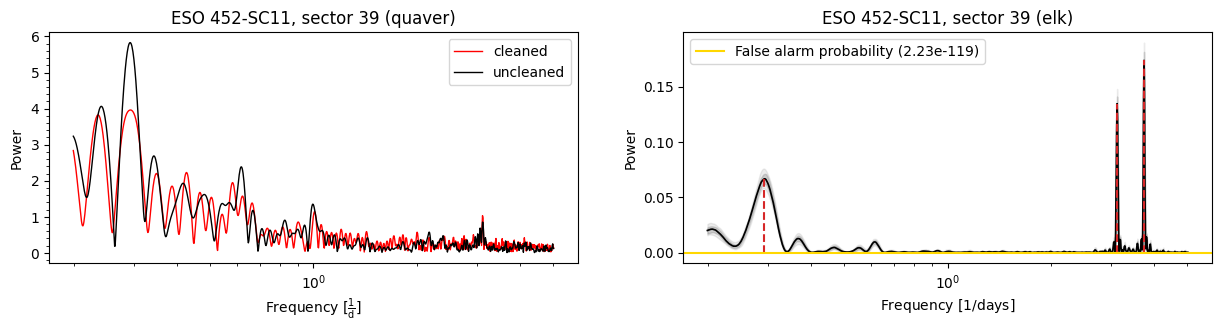

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


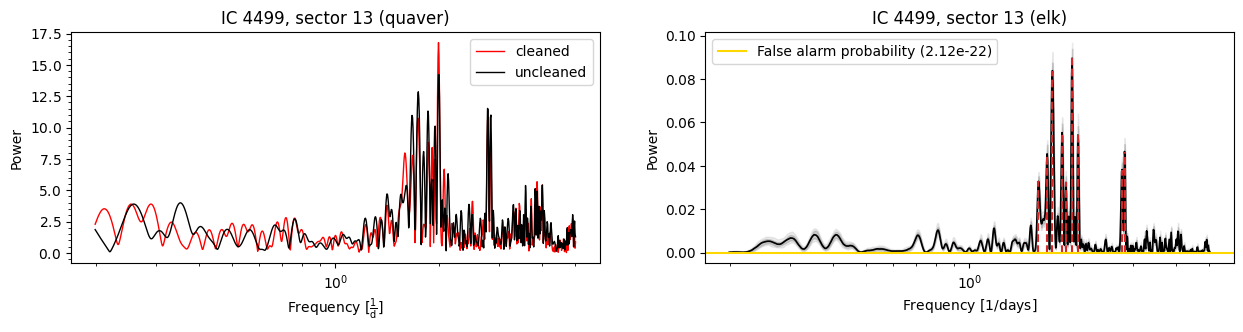

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


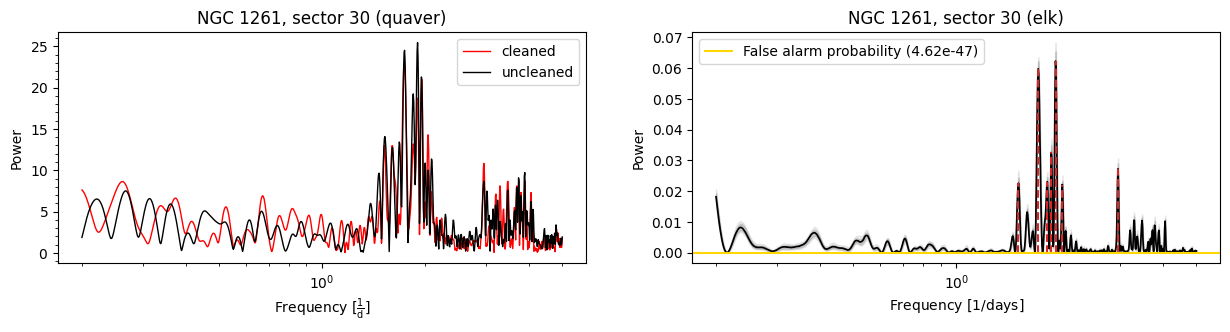

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


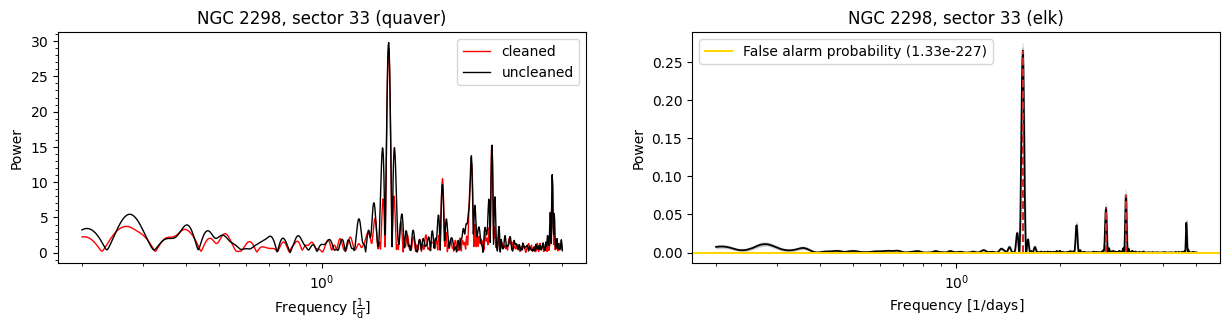

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


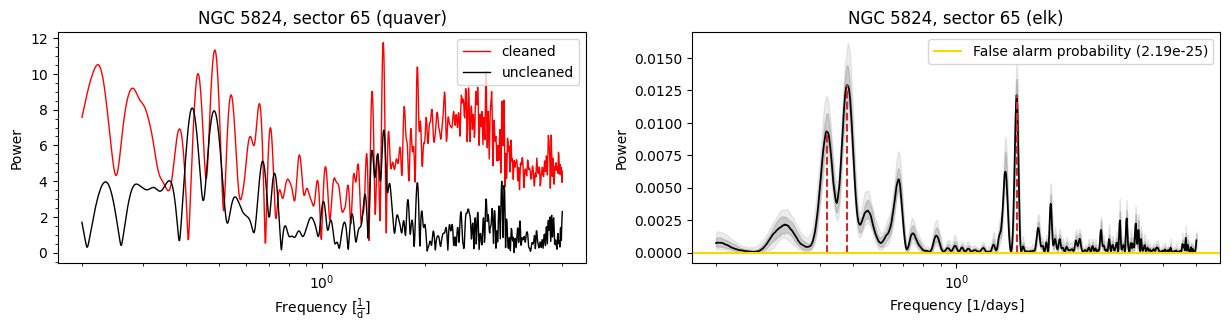

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


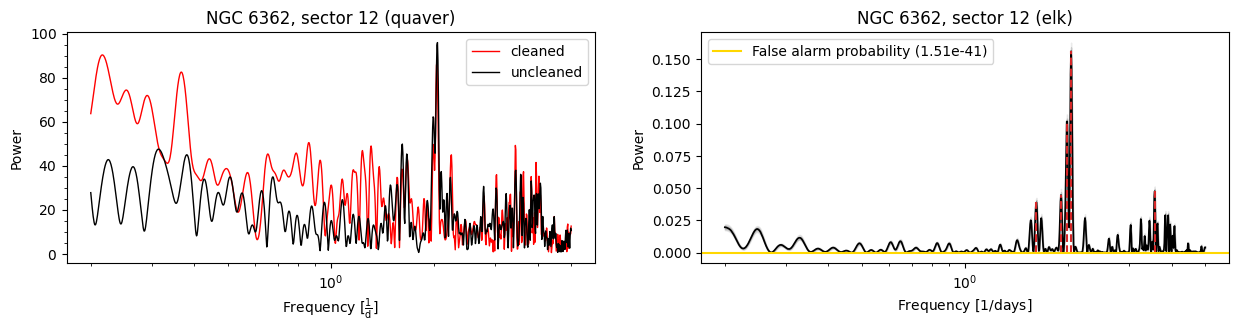

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


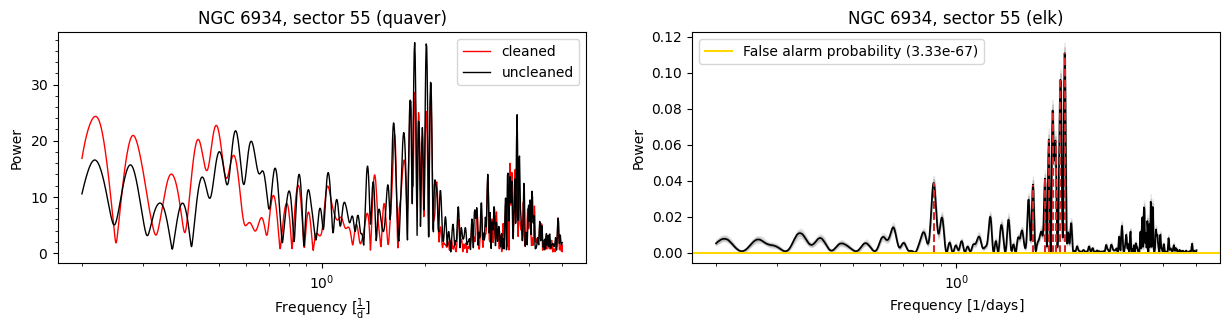

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


[Errno 2] No such file or directory: 'E:results new/elk globular clusters 102/M 56output_table.fits'


The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


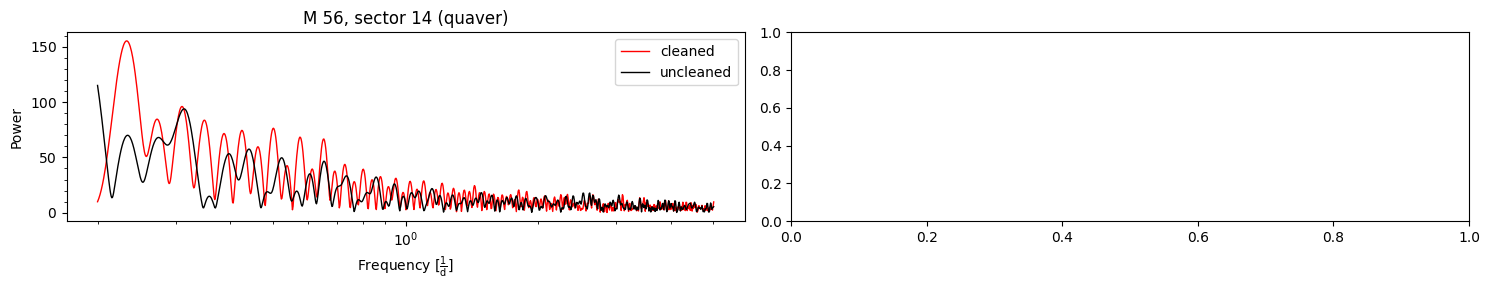

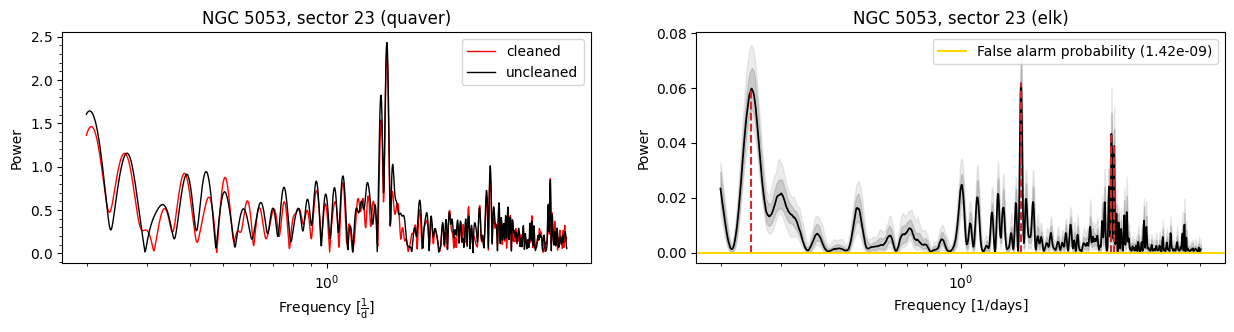

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


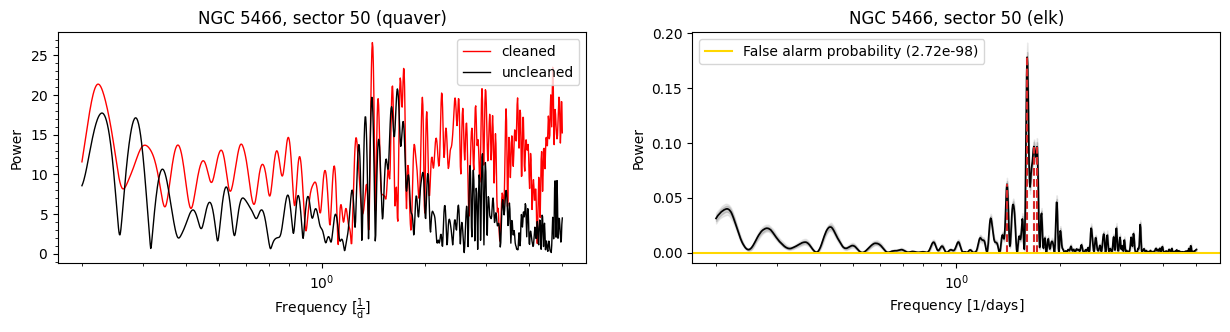

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


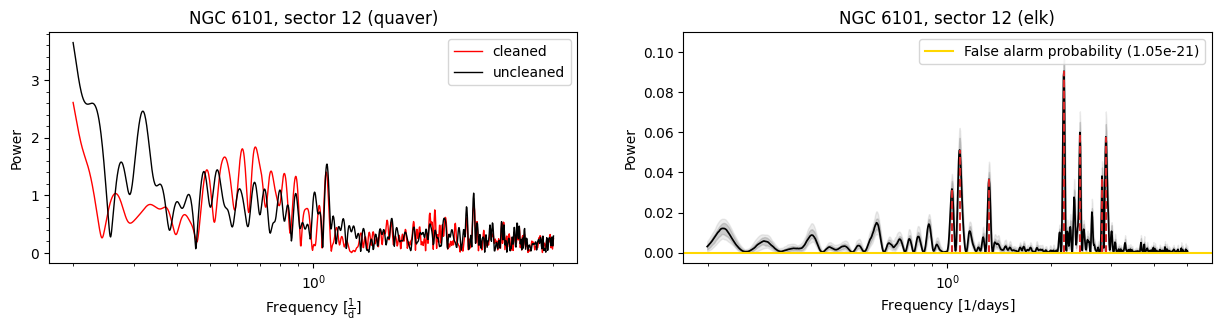

The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.
The requested periodogram is not evenly sampled in frequency.
Method has been changed from 'fast' to 'slow' to allow for this.


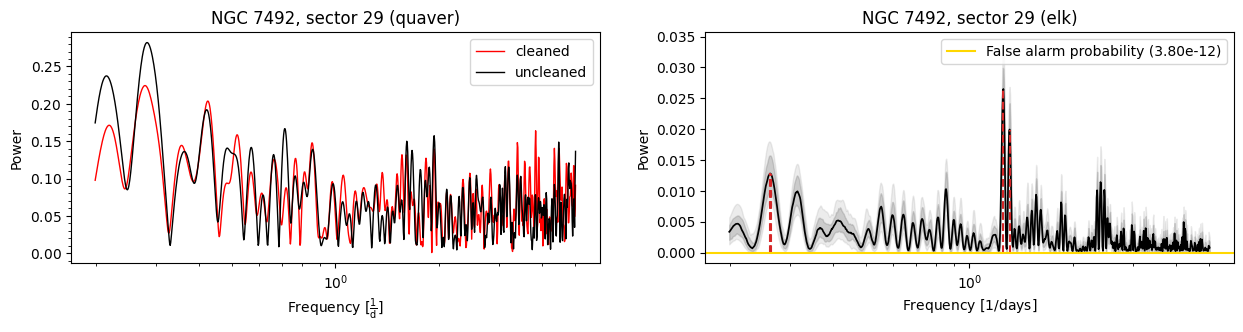

In [87]:
#quaver elk side by side final
import matplotlib.pyplot as plt
import elk
import os
from astropy.table import Table
import lightkurve as lk
from astropy.io import fits
import numpy as np

galaxies, sectors = [], []
with open('GCs right now.txt', 'r') as file:
    for line in file:
        columns = line.split('\t')
        galaxies.append(columns[0])
        sectors.append(columns[1])
galaxies = ['IC 4499', 'NGC 2298', 'NGC 6362', 'NGC 5053']
sectors = ['13', '33', '12', '23']
method = 'full_hybrid'
catalog_q = 'Milky Way GCs 102'
elkdir = 'elk globular clusters 102'
end = 0.7 #freq range, 0.7 for clusters, 1 for galaxies

#galaxies = ['NGC 3568']#, 'IC 5325', 'NGC 1232', 'NGC 4395']
#sectors = ['36']#, '2', '4', '22']
#dirs = ['AGN Imag 700']#, 'AGN Imag 700', 'non-AGN Imag 30am 700', 'AGN Rmag 263']
#elkdirs = ['elk AGN Imag 300']#, 'elk AGN Imag 300', 'elk non-AGN 300', 'elk AGN Rmag 100']

#fig1, (ax1, ax2) = plt.subplots(4, 2, figsize=(15, 12))
fig_combined, axes = plt.subplots(len(galaxies), 2, figsize=(15, len(galaxies)*3))
for i,galaxy in enumerate(galaxies):
    #catalog_q = dirs[i]
    #elkdir = elkdirs[i]
    galaxyname = galaxy.strip().replace("â€“", "-").replace(" ","")
    folder_path = "E:results new/"+catalog_q+'/'+galaxyname
    sector = sectors[i]
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    
    """diamfolder = "E:results new/diameter redoredos/"+catalog_q+' diameter redoredo/'+galaxyname
    for filename in os.listdir(diamfolder):
        if filename == galaxyname+"_sector"+sector+"_"+method+"_lc_diameter_cleaned.fits":       
            lc_dc = fits.open(folder_path+'/'+filename)
            data_dc = lc_dc[1].data
            time_dc = data_dc['time']
            flux_dc = data_dc['flux']
            tesslc_dc = lk.LightCurve(time=time_dc, flux=flux_dc)
            pg_dc = tesslc_dc.to_periodogram(frequency=np.logspace(-end, end, 1000))
            pg_dc.plot(ax=ax1, color="orange", linewidth=1, label='diameter uncleaned') 
        if filename == galaxyname+"_sector"+sector+"_"+method+"_lc_diameter.dat":     
            file = galaxyname+'_sector'+sector+'_'+method+'_lc_diameter'
            full_file_path = os.path.join(diamfolder, file + ".fits")
            if not os.path.exists(full_file_path):
                data = np.genfromtxt(diamfolder+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
                table = Table(data)
                table.write(diamfolder+'/'+file+'.fits', format='fits', overwrite=True)      
            lc_d = fits.open(full_file_path)
            data_d = lc_d[1].data
            time_d = data_d['time']
            flux_d = data_d['flux']
            tesslc_d = lk.LightCurve(time=time_d, flux=flux_d)
            pg_d = tesslc.to_periodogram(frequency=np.logspace(-end, end, 1000))
            pg_d.plot(ax=ax1, color="r", linewidth=1, label='diameter cleaned') #"""
    for filename in os.listdir(folder_path):
        if filename == galaxyname+"_sector"+sector+"_"+method+"_lc_cleaned.fits":       
            lc_cleaned = fits.open(folder_path+'/'+filename)
            data_c = lc_cleaned[1].data
            time_c = data_c['time']
            flux_c = data_c['flux']
            tesslc_c = lk.LightCurve(time=time_c, flux=flux_c)
            pg_c = tesslc_c.to_periodogram(frequency=np.logspace(-end, end, 1000))
            pg_c.plot(ax=ax1, color="k", linewidth=1, label='uncleaned')   
            ax1.set_xscale('log')
            ax1.set_title(galaxy+', sector '+sector+' (quaver)')
            ax1.legend() #"""
        if filename == galaxyname+"_sector"+sector+"_"+method+"_lc.dat":
            file = galaxyname+'_sector'+sector+'_'+method+'_lc'
            full_file_path = os.path.join(folder_path, file + ".fits")
            if not os.path.exists(full_file_path):
                data = np.genfromtxt(folder_path+'/'+file+'.dat', names=['time', 'flux', 'flux_err'], dtype=None)
                table = Table(data)
                table.write(folder_path+'/'+file+'.fits', format='fits', overwrite=True)               
            lc_quaver = fits.open(full_file_path)
            data_q = lc_quaver[1].data
            time_q = data_q['time']
            flux_q = data_q['flux']
            tesslc = lk.LightCurve(time=time_q, flux=flux_q)
            pg = tesslc.to_periodogram(frequency=np.logspace(-end, end, 1000))
            pg.plot(ax=ax1, color="r", linewidth=1, label='cleaned') #"""
            ax1.set_xscale('log')
            ax1.set_title(galaxy+', sector '+sector+' (quaver)')
            ax1.legend() #"""
            
    try:
        a = elk.ensemble.from_fits('E:results new/'+elkdir+'/'+galaxy+"output_table.fits")
        if len(a.lcs) > 0:
            for sec in range(0,len(a.lcs)):
                if a.lcs[sec].sector == float(sector):
                    lc_e = a.lcs[sec]
                    if hasattr(lc_e, 'sector'):
                        lc_e.to_periodogram(frequencies=np.logspace(-end, end, 1000))
                        lc_e.plot_periodogram(fig=fig1,ax=ax2,title=galaxy+', sector '+sector+' (elk)') 
                        break
    except FileNotFoundError as e:
        print(e) #"""
        
fig1.tight_layout()
#fig1.savefig('../figures/python plots/periodograms GCs.png')

In [52]:
w = EnsembleLC(output_path="elk test",
               identifier='NGC 5068',
               location='199.7284, -21.0391',
               radius=.060,
               cutout_size=30,
               verbose=True)
w.create_output_table()

NameError: name 'EnsembleLC' is not defined

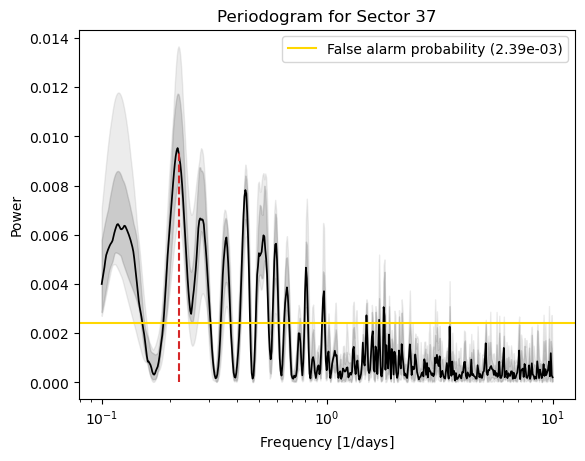

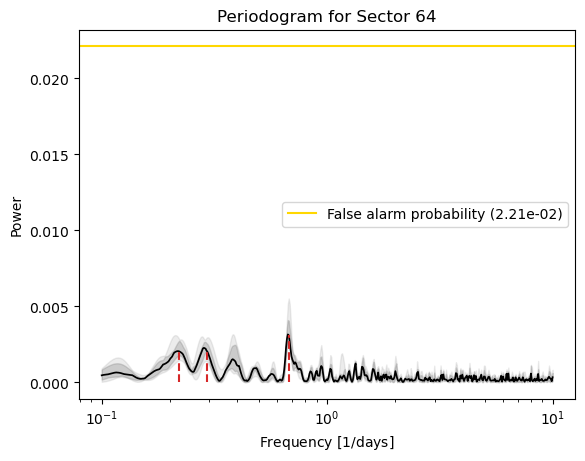

In [28]:
lcw1 = w.lcs[1]
lcw2 = w.lcs[2]
#lcw.plot()
lcw1.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_ = lcw1.plot_periodogram()
lcw2.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_2 = lcw2.plot_periodogram()
#_ = lcw.plot_acf()

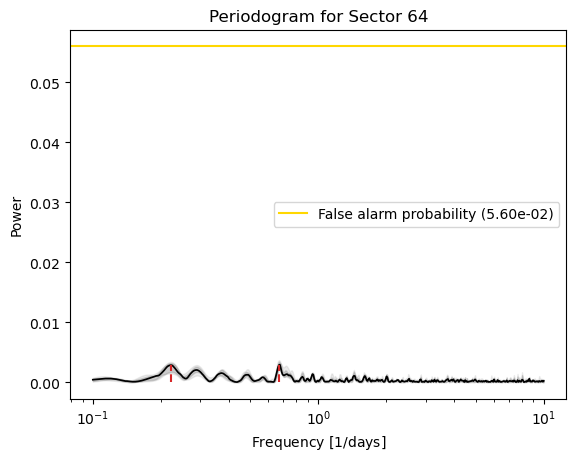

In [29]:
lcw = w.lcs[2]
lcw.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_ = lcw.plot_periodogram()

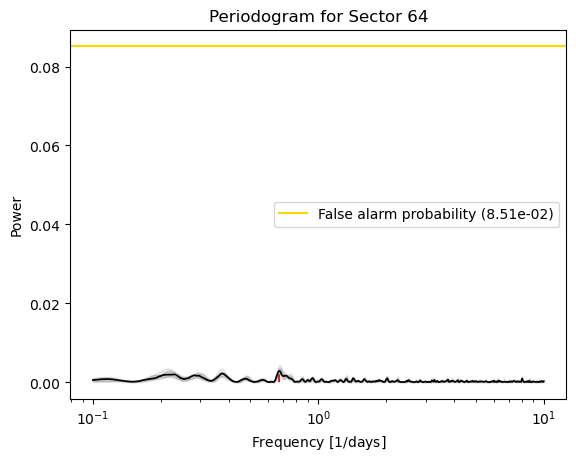

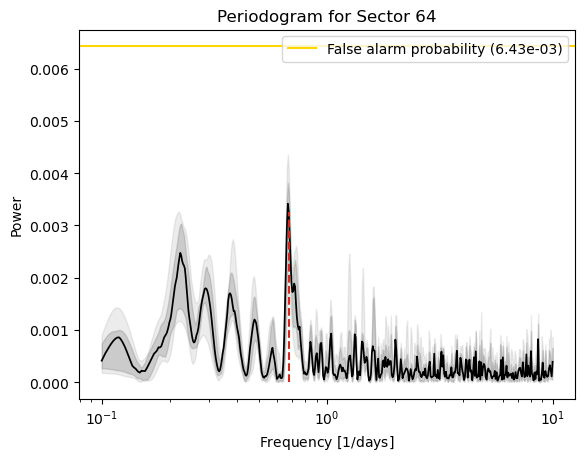

In [31]:
lcw2 = w.lcs[2]
lcw = w.lcs[2]
lcw.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_ = lcw.plot_periodogram()
lcw2.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
_2 = lcw2.plot_periodogram()

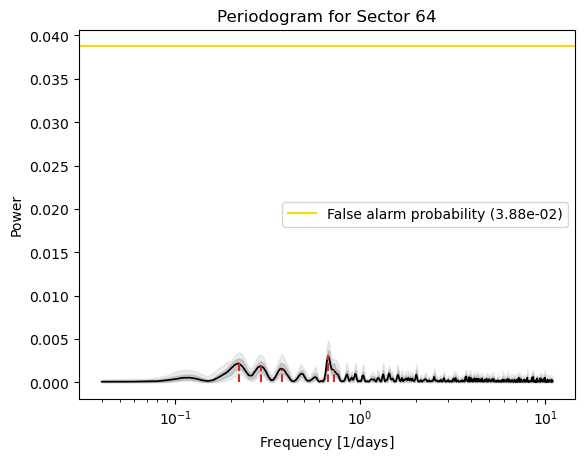

array([0.22, 0.29, 0.38, 0.67, 0.72])

In [66]:
lcw.plot_periodogram()
lcw.stats['peak_freqs'][:lcw.stats['n_peaks']]

In [7]:
lcw = w.lcs[1]
lcw.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)

(array([3.15144909e-04, 3.26176947e-04, 3.37296430e-04, 3.39151421e-04,
        3.34449833e-04, 3.29599480e-04, 3.30359141e-04, 3.30521571e-04,
        3.30042625e-04, 3.28876136e-04, 3.26974855e-04, 3.24292031e-04,
        3.20783595e-04, 3.16410894e-04, 3.11143801e-04, 3.07295681e-04,
        3.05623198e-04, 3.03380722e-04, 3.00502488e-04, 2.96939550e-04,
        2.92663382e-04, 2.87668412e-04, 2.84397176e-04, 2.89665281e-04,
        2.93520706e-04, 2.95826460e-04, 2.96451179e-04, 2.95271567e-04,
        2.92176748e-04, 2.87074867e-04, 2.79901990e-04, 2.58687642e-04,
        2.35033218e-04, 2.10704896e-04, 1.89756496e-04, 1.83832666e-04,
        1.78231900e-04, 1.73233973e-04, 1.58127039e-04, 1.40232709e-04,
        1.38415965e-04, 1.39494455e-04, 1.56426608e-04, 1.75689622e-04,
        1.97157740e-04, 2.17763567e-04, 2.12303435e-04, 1.96991219e-04,
        1.87755228e-04, 1.84789924e-04, 1.88228398e-04, 1.98152283e-04,
        2.14598435e-04, 2.39307368e-04, 2.66989374e-04, 3.027785

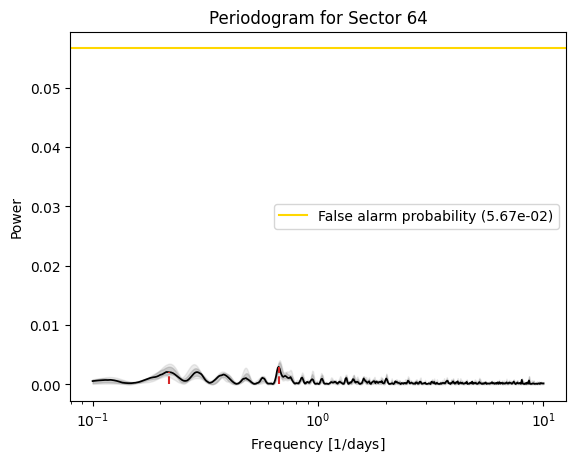

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Periodogram for Sector 64'}, xlabel='Frequency $[1 / {\\rm days}]$', ylabel='Power'>)

In [17]:
lcw.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
lcw.plot_periodogram()

In [9]:
pg = lcw.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
print(len(pg))
print(len(pg[0]))
print(len(pg[1]))
print(len(pg[2]))

3
500
4
9


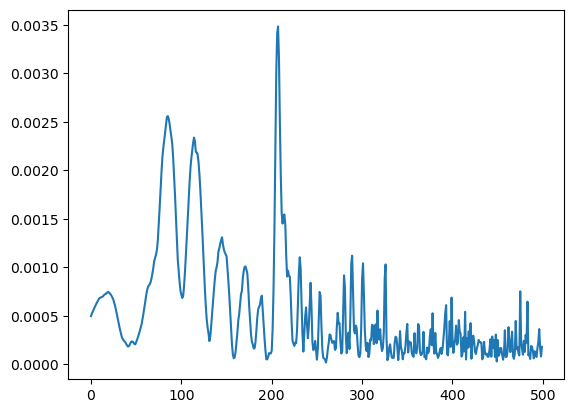

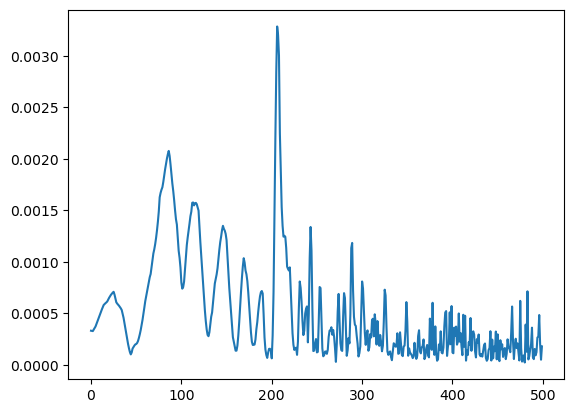

In [37]:
plt.plot(pg[0])
plt.show()
pg2 = lcw2.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
plt.plot(pg2[0])
plt.show()

In [46]:
print(len(pg[1][0]))
print(len(pg[1][1]))
print(len(pg[1][2]))
print(len(pg[1][3]))

print(pg[2])

500
500
500
500
{'max_power': 0.0034835896160812308, 'freq_at_max_power': 0.6755528315331643, 'peak_freqs': array([0.21710676, 0.29169559, 0.67555283, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 'peak_left_edge': array([0.19434669, 0.27344737, 0.65106936]), 'peak_right_edge': array([0.24253227, 0.30547097, 0.70095701]), 'power_at_peaks': array([0.00202695, 0.00201736, 0.00298375, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 'n_peaks': 3, 'ratio_of_power_at_high_v_low_freq': 3.598380644433491, 'FA

In [61]:
lcw.stats
lcw.get_stats_table(name=w.identifier)

<Table length=1>
  name         max_power       ...         FAP         
  str8          float64        ...       float64       
-------- --------------------- ... --------------------
NGC 5068 0.0032858704206584263 ... 0.011862336391159385

In [62]:
lcw.rms
lcw.get_stats_using_defaults()

{'max_power': 0.003031079673079586,
 'freq_at_max_power': 0.6700000000000002,
 'peak_freqs': array([0.22, 0.29, 0.38, 0.67, 0.72, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]),
 'peak_left_edge': array([0.19, 0.27, 0.35, 0.65, 0.71]),
 'peak_right_edge': array([0.25, 0.31, 0.41, 0.7 , 0.73]),
 'power_at_peaks': array([0.00162799, 0.00131411, 0.00106495, 0.002213  , 0.00096838,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'n_peaks': 5,
 'ratio_of_power_at_high_v_low_freq': 2.091511624256684,
 'FAP': 0.03875031998345525,
 'rms': 0.013190984560956565,
 'std': 0.00030447025,
 'MAD': 0.0002052784,
 'sigmaG': 0.0003042467899940893,
 'skewness': 688.3436,
 'von_neumann_ratio': 

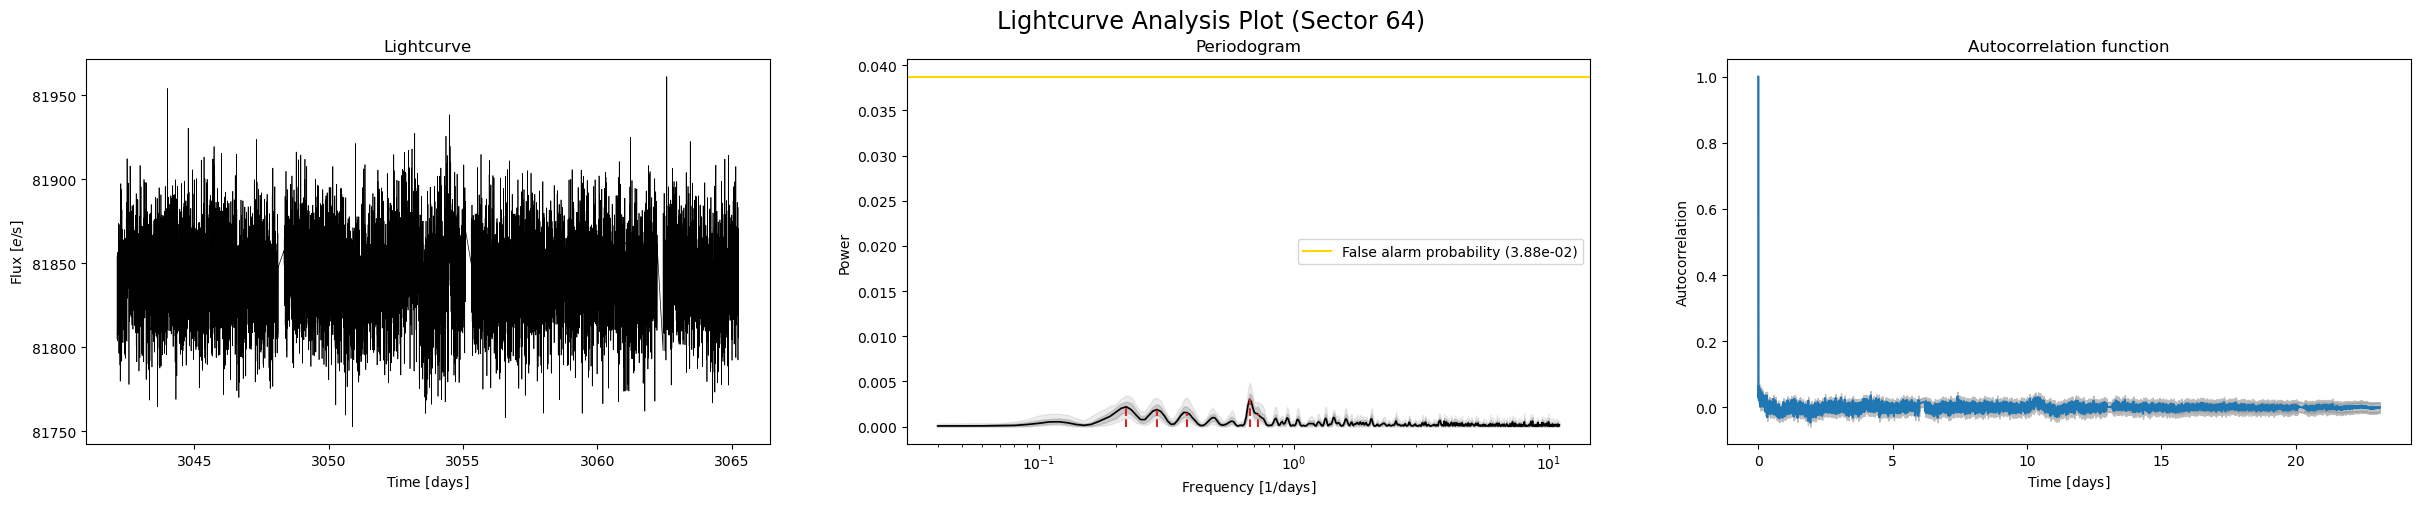

In [64]:
_ = lcw.analysis_plot()

<function matplotlib.pyplot.show(close=None, block=None)>

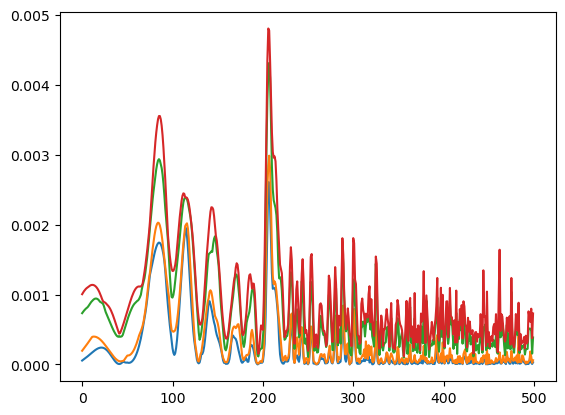

In [55]:
plt.plot(pg[1][0])
plt.plot(pg[1][1])
plt.plot(pg[1][2])
plt.plot(pg[1][3])
plt.show

In [67]:
lcw.diagnose_lc_periodogram(output_path='elk test/', identifier='NGC 5068')[0]

C:\Users\Gumbledalf\Miniconda3\envs\elk\Lib\site-packages\astroquery\simbad\core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:19:05.08941381 -21:01:34.60359121': No astronomical object found :  
  warnings.warn("Warning: The script line number %i raised "


TypeError: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).

In [68]:
print(lcw)

<TESSCutLightcurve: TESS Sector 64, 9690 timesteps>
